In [ ]:
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import numpy as np
from skimage import io, color, feature
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate

### Data distribution 

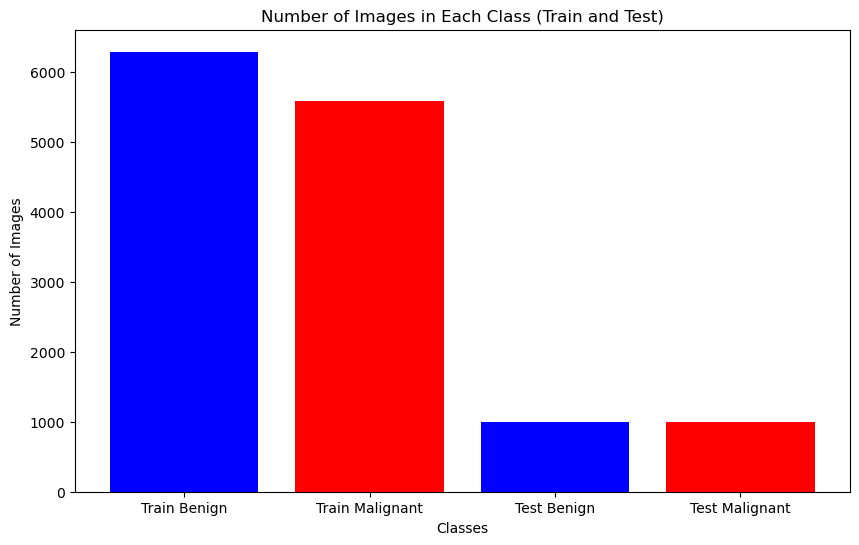

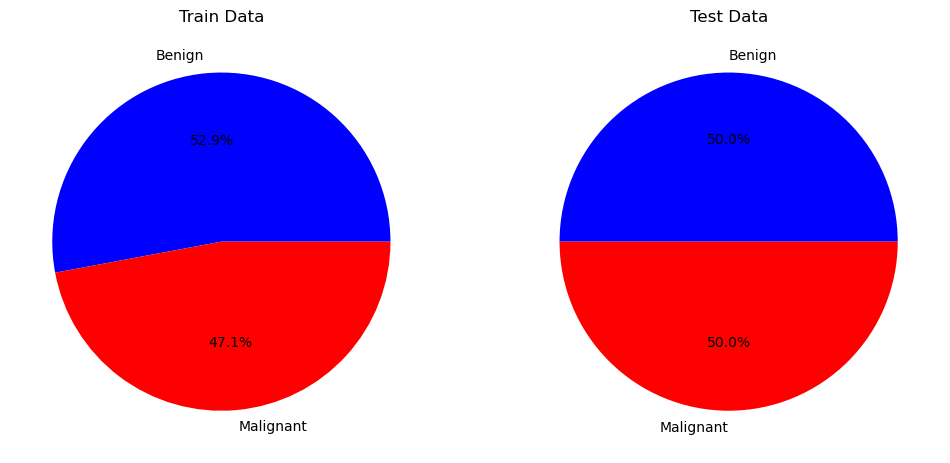

In [1]:
# Define the directories
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Function to count images in each class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in train and test directories
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Combine counts for bar plot
combined_counts = {
    'Train Benign': train_counts.get('Benign', 0),
    'Train Malignant': train_counts.get('Malignant', 0),
    'Test Benign': test_counts.get('Benign', 0),
    'Test Malignant': test_counts.get('Malignant', 0)
}

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(combined_counts.keys(), combined_counts.values(), color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train and Test)')
plt.show()

# Plot pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for train data
axs[0].pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
axs[0].set_title('Train Data')

# Pie chart for test data
axs[1].pie(test_counts.values(), labels=test_counts.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
axs[1].set_title('Test Data')

plt.show()


### Displaying images

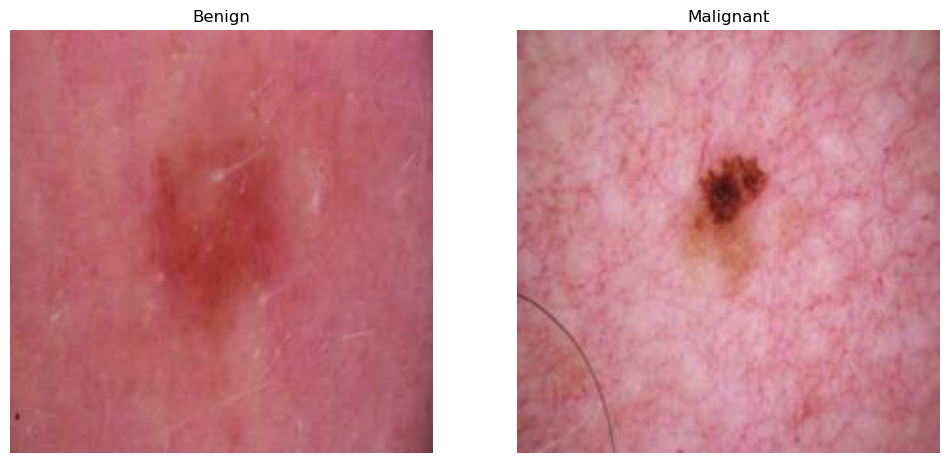

In [2]:
# Function to get a random image path from a class directory
def get_random_image_path(class_dir):
    image_files = os.listdir(class_dir)
    random_image_file = random.choice(image_files)
    return os.path.join(class_dir, random_image_file)

# Get the paths to the random images
benign_dir = os.path.join(train_dir, 'Benign')
malignant_dir = os.path.join(train_dir, 'Malignant')

benign_image_path = get_random_image_path(benign_dir)
malignant_image_path = get_random_image_path(malignant_dir)

# Load and display the images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display Benign image
benign_image = mpimg.imread(benign_image_path)
axs[0].imshow(benign_image)
axs[0].set_title('Benign')
axs[0].axis('off')

# Display Malignant image
malignant_image = mpimg.imread(malignant_image_path)
axs[1].imshow(malignant_image)
axs[1].set_title('Malignant')
axs[1].axis('off')

plt.show()

## EDA

#### Histogram with pixel intensity of images for each class

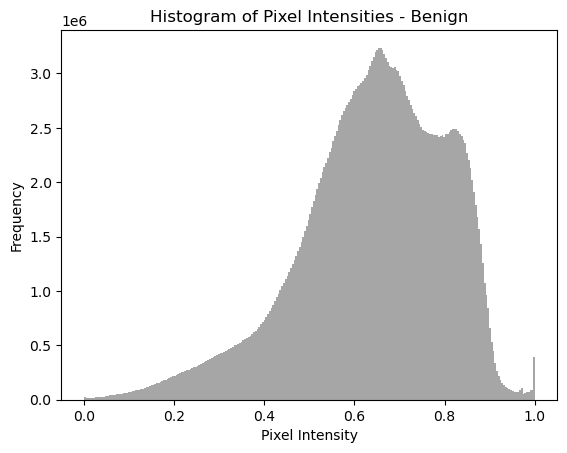

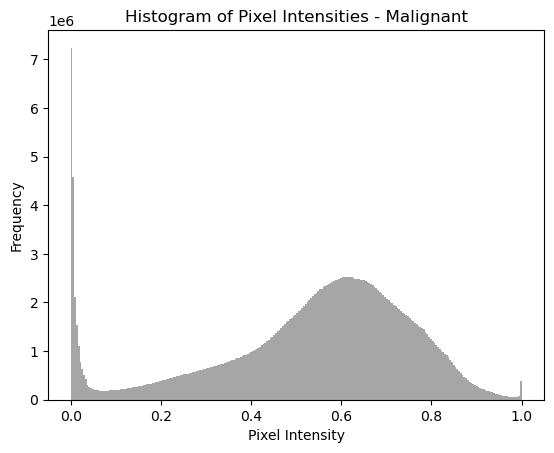

In [4]:
# Function to get all image paths from a class directory
def get_image_paths(class_dir):
    return [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]

# Function to load images and convert them to grayscale
def load_images(image_paths):
    images = [color.rgb2gray(io.imread(img_path)) for img_path in image_paths]
    return images

# Function to plot histogram of pixel values
def plot_histogram(images, title):
    pixel_values = np.concatenate([img.flatten() for img in images])
    plt.hist(pixel_values, bins=256, range=(0, 1), color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

# Plot histograms
plot_histogram(benign_images, 'Histogram of Pixel Intensities - Benign')
plot_histogram(malignant_images, 'Histogram of Pixel Intensities - Malignant')


### Pixel intensity on RGB channels

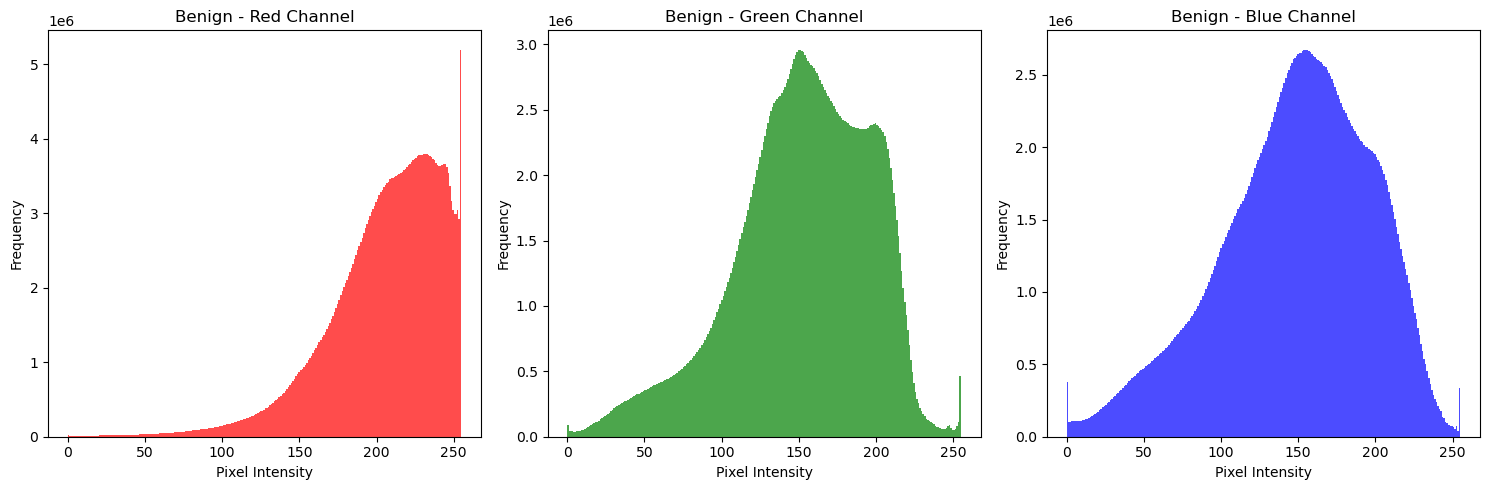

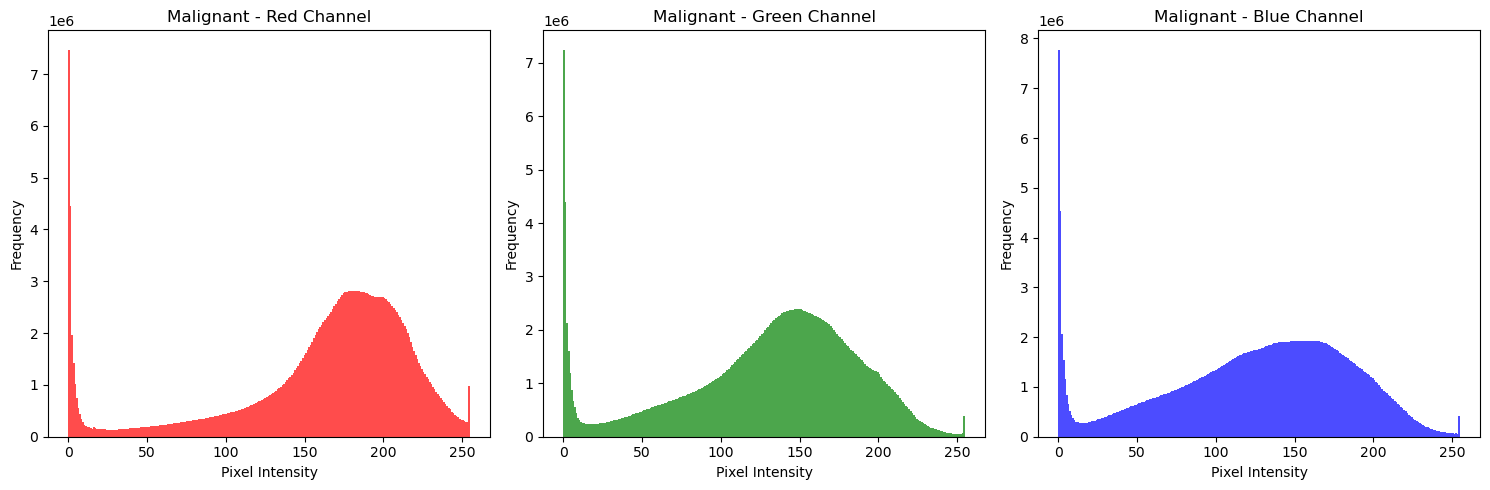

In [5]:
# Function to get all image paths from a class directory
def get_image_paths(class_dir):
    return [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]

# Function to load images and extract RGB channels
def load_images_and_extract_rgb(image_paths):
    red_channel = []
    green_channel = []
    blue_channel = []
    for img_path in image_paths:
        image = io.imread(img_path)
        red_channel.append(image[:, :, 0].flatten())
        green_channel.append(image[:, :, 1].flatten())
        blue_channel.append(image[:, :, 2].flatten())
    return np.concatenate(red_channel), np.concatenate(green_channel), np.concatenate(blue_channel)

# Function to plot RGB histograms
def plot_rgb_histograms(red_channel, green_channel, blue_channel, title):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(red_channel, bins=256, color='red', alpha=0.7)
    plt.title(f'{title} - Red Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(green_channel, bins=256, color='green', alpha=0.7)
    plt.title(f'{title} - Green Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(blue_channel, bins=256, color='blue', alpha=0.7)
    plt.title(f'{title} - Blue Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images and extract RGB channels
benign_red, benign_green, benign_blue = load_images_and_extract_rgb(benign_image_paths)
malignant_red, malignant_green, malignant_blue = load_images_and_extract_rgb(malignant_image_paths)

# Plot RGB histograms for each class
plot_rgb_histograms(benign_red, benign_green, benign_blue, 'Benign')
plot_rgb_histograms(malignant_red, malignant_green, malignant_blue, 'Malignant')


### Looking for texture patterns in images

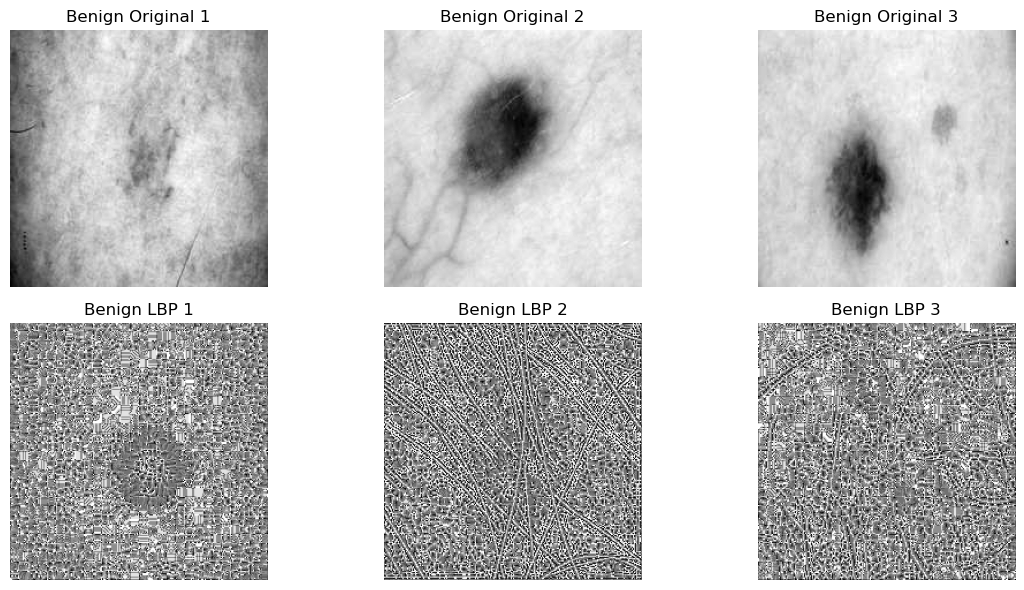

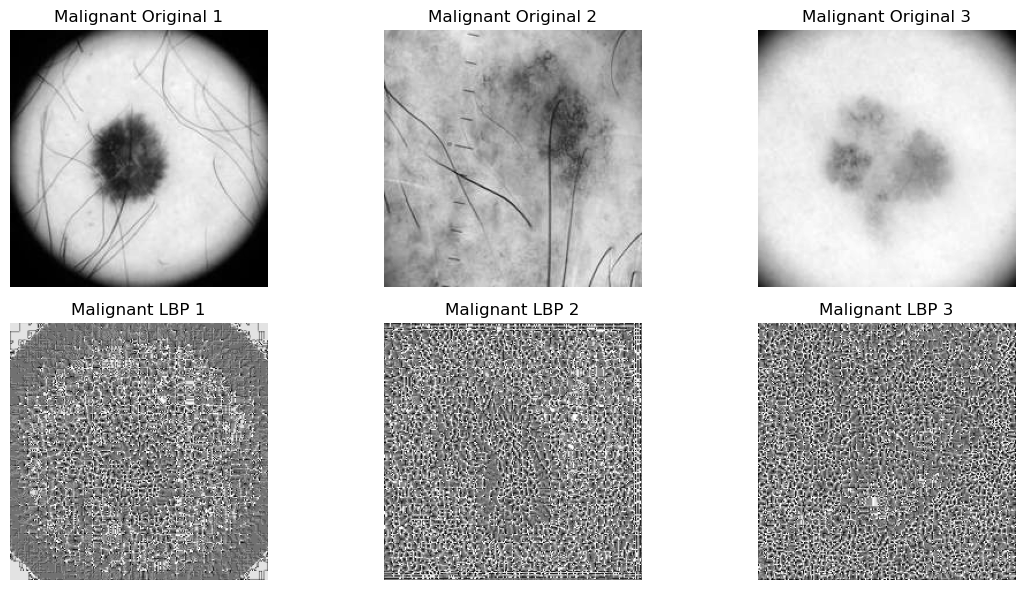

In [6]:
# Function to get all image paths from a class directory
def get_image_paths(class_dir):
    return [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]

# Function to load images and convert them to grayscale
def load_images(image_paths):
    return [color.rgb2gray(io.imread(img_path)) for img_path in image_paths]

# Function to compute LBP for images
def compute_lbp(images, P=8, R=1):
    lbp_images = [feature.local_binary_pattern(image, P, R, method='uniform') for image in images]
    return lbp_images

# Function to plot original and LBP images side by side
def plot_lbp_images(original_images, lbp_images, title):
    plt.figure(figsize=(12, 6))
    for i in range(3):
        plt.subplot(2, 3, i + 1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'{title} Original {i+1}')
        plt.axis('off')
        
        plt.subplot(2, 3, i + 4)
        plt.imshow(lbp_images[i], cmap='gray')
        plt.title(f'{title} LBP {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images and compute LBP
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

benign_lbp_images = compute_lbp(benign_images)
malignant_lbp_images = compute_lbp(malignant_images)

# Plot original and LBP images for a few random samples
plot_lbp_images(random.sample(benign_images, 3), random.sample(benign_lbp_images, 3), 'Benign')
plot_lbp_images(random.sample(malignant_images, 3), random.sample(malignant_lbp_images, 3), 'Malignant')


### Data preprocessing

#### Apply SIFT algorithm

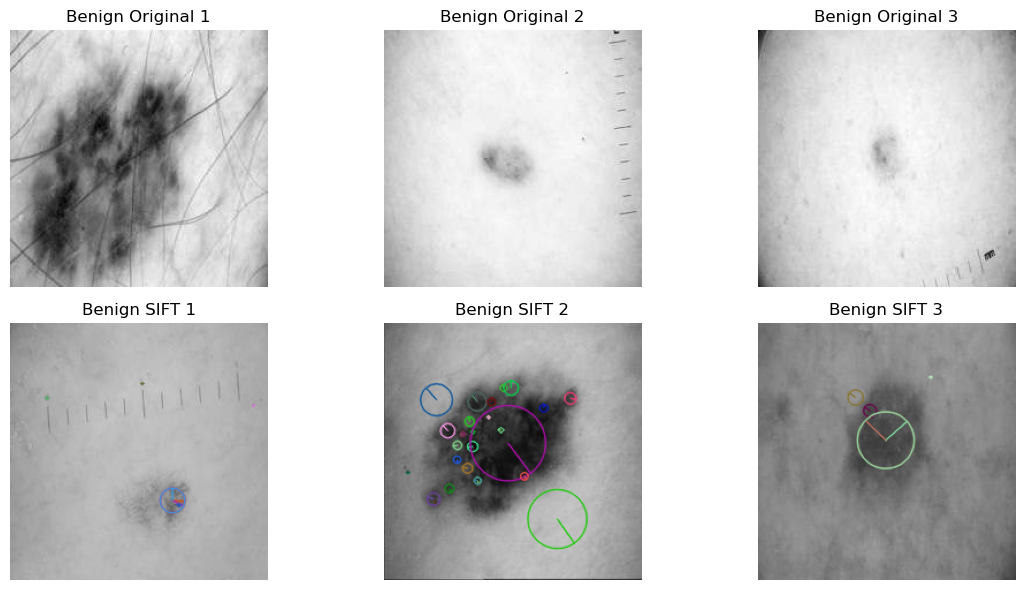

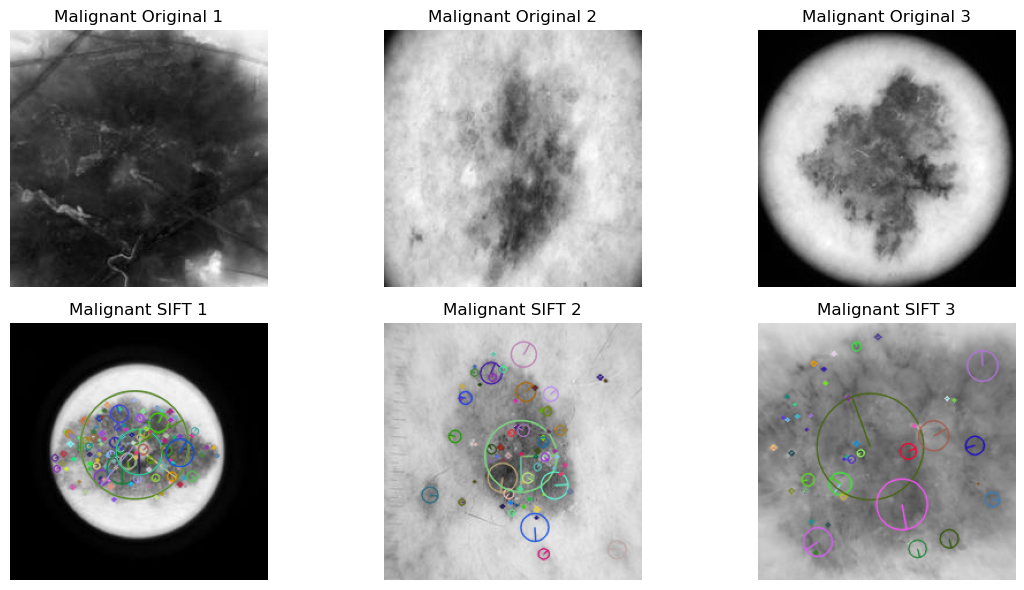

In [7]:
# Function to apply SIFT and draw keypoints on images
def apply_sift(images):
    sift = cv2.SIFT_create()
    sift_images = []
    for image in images:
        keypoints, descriptors = sift.detectAndCompute(image, None)
        sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        sift_images.append(sift_image)
    return sift_images

# Function to plot original and SIFT images side by side
def plot_sift_images(original_images, sift_images, title):
    plt.figure(figsize=(12, 6))
    for i in range(3):
        plt.subplot(2, 3, i + 1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'{title} Original {i+1}')
        plt.axis('off')
        
        plt.subplot(2, 3, i + 4)
        plt.imshow(sift_images[i], cmap='gray')
        plt.title(f'{title} SIFT {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

# Apply SIFT
benign_sift_images = apply_sift(benign_images)
malignant_sift_images = apply_sift(malignant_images)

# Plot original and SIFT images for a few random samples
plot_sift_images(random.sample(benign_images, 3), random.sample(benign_sift_images, 3), 'Benign')
plot_sift_images(random.sample(malignant_images, 3), random.sample(malignant_sift_images, 3), 'Malignant')


#### Perform data augumentation

Found 11879 images belonging to 2 classes.


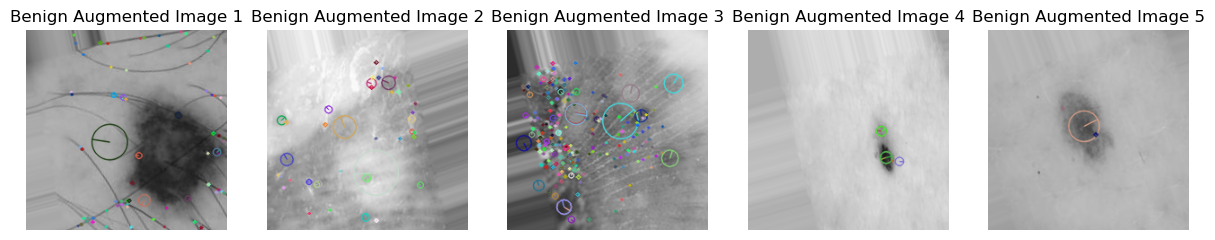

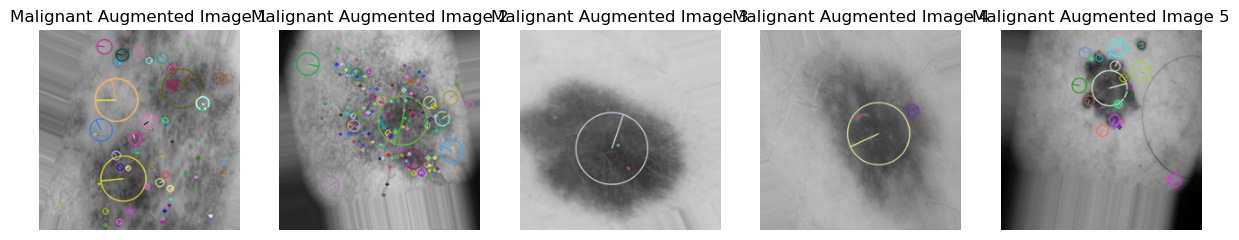

In [15]:
# Function to apply SIFT and draw keypoints on images
def apply_sift(image):
    # Convert image to grayscale if it's not already
    if image.ndim == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray_image = image.copy()

    # Ensure image is in correct format (CV_8U) for SIFT
    if gray_image.dtype != np.uint8:
        gray_image = gray_image.astype(np.uint8)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    sift_image = cv2.drawKeypoints(gray_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return sift_image

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(15, 6))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(f'{title} Image {i+1}')
        plt.axis('off')
    plt.show()

# Data augmentation setup with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for reading images from directory with augmentation
batch_size = 5
generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Generate augmented images and apply SIFT
augmented_images = []
for _ in range(batch_size):
    batch = generator.next()
    for img in batch[0]:
        sift_image = apply_sift(img)
        augmented_images.append(sift_image)

# Display random 5 images from each class
display_images(augmented_images[:5], 'Benign Augmented')
display_images(augmented_images[5:], 'Malignant Augmented')


### Simple CNN model without SIFT preprocessing

In [18]:
# Define parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 10
validation_split = 0.2  # 20% of training data will be used for validation

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split  # Specify validation split here
)

# Generate training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' if more than 2 classes
    subset='training'  # Specify this is the training set
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' if more than 2 classes
    subset='validation'  # Specify this is the validation set
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' and change units for more than 2 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1
)

Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.
Epoch 1/10
297/297 [==============================] - 140s 450ms/step - loss: 0.5072 - accuracy: 0.7479 - val_loss: 0.6015 - val_accuracy: 0.7306
Epoch 2/10
297/297 [==============================] - 134s 451ms/step - loss: 0.4037 - accuracy: 0.8185 - val_loss: 0.5576 - val_accuracy: 0.7635
Epoch 3/10
297/297 [==============================] - 134s 451ms/step - loss: 0.3872 - accuracy: 0.8349 - val_loss: 0.5930 - val_accuracy: 0.7302
Epoch 4/10
297/297 [==============================] - 136s 458ms/step - loss: 0.3652 - accuracy: 0.8466 - val_loss: 0.4950 - val_accuracy: 0.7796
Epoch 5/10
297/297 [==============================] - 137s 460ms/step - loss: 0.3631 - accuracy: 0.8427 - val_loss: 0.5190 - val_accuracy: 0.7517
Epoch 6/10
297/297 [==============================] - 160s 537ms/step - loss: 0.3496 - accuracy: 0.8516 - val_loss: 0.5128 - val_accuracy: 0.7948
Epoch 7/10
297/297 [====================

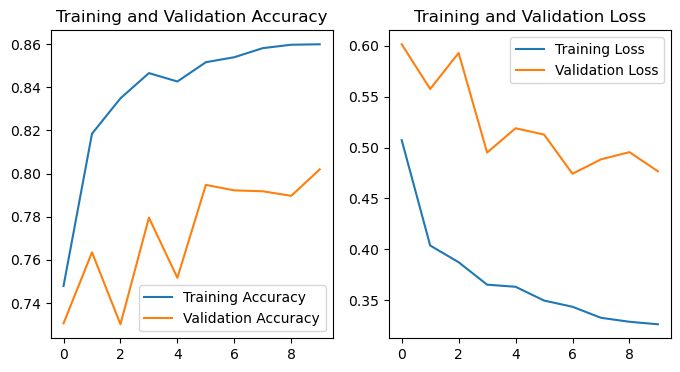

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

#### Simple CNN model with SIFT

In [ ]:
### NEED to be done to check effects of SIFT on Model